# Test Campaign Planning Template
Planning for a standard DVS test campaign. WORK IN PROGRESS by aph@sarao.ac.za.

                                                              As on 24/09/2024

In [1]:
%pylab inline
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import katpoint
from dvs import planning, cattools

/home/aph/work/dvs/libraries/analysis/katsemodels.py:1156: RuntimeWarning: divide by zero encountered in divide
  I_therm = lambda p, f_MHz: p[0] * (f_MHz/p[1])**2 * (1 - np.exp(-(f_MHz/p[1])**-2)) # The radiation intensity of a nebula in thermal equilibruim... Opacity tau(f)=(f/p[1])^2 fits the data.
/home/aph/work/dvs/libraries/analysis/katsemodels.py:1156: RuntimeWarning: invalid value encountered in multiply
  I_therm = lambda p, f_MHz: p[0] * (f_MHz/p[1])**2 * (1 - np.exp(-(f_MHz/p[1])**-2)) # The radiation intensity of a nebula in thermal equilibruim... Opacity tau(f)=(f/p[1])^2 fits the data.


In [3]:
## Some available catalogues:
!ls ../catalogues

arrays		rfi_mask.txt	 targets_pnt_Ku.csv  targets_pnt_S.csv
fluxmodels.csv	sources_all.csv  targets_pnt_L.csv


In [4]:
def mkTobs(day):
    """ @param day: "YYYY-MM-DD"
        @return: (Tstart, Tstop) in UTC seconds """
    day_startend = ["00:00:00", "23:59:59"] # UTC times to start & stop each day's assessment
    # Alternative for specifying a time in UTC: np.datetime64(f"{day}T{_}").astype(float)
    return [katpoint.Timestamp(f"{day} {_}").secs for _ in day_startend]  # Start & stop, in UTC seconds


## Planning for Pointing Measurements

In [5]:
# The calendar day to run the assessment for
Tobs = mkTobs("2024-07-01")

Using  ../catalogues/targets_pnt_S.csv
  # VCS1 J0211+1051, tags=radec, 2:11:13.20 10:51:34.8, no flux info appears within 10 deg from [<katpoint.Target 'Moon' body=special at 0x7f09ecef2160>]
  # PKS J0231+1322, tags=radec, 2:31:45.90 13:22:54.7, no flux info appears within 10 deg from [<katpoint.Target 'Moon' body=special at 0x7f09ecef2160>]
  # PKS J0238+1636, tags=radec, 2:38:38.90 16:36:59.3, no flux info appears within 10 deg from [<katpoint.Target 'Moon' body=special at 0x7f09ecef2160>]
  # Planning drops the following due to being within 1 deg away from other targets:
[<katpoint.Target 'VCS1 J0211+1051' body=radec at 0x7f09ecf59760>
 <katpoint.Target 'PKS J0231+1322' body=radec at 0x7f09ecf597f0>
 <katpoint.Target 'PKS J0238+1636' body=radec at 0x7f09ecf59850>]


/home/aph/venv-py3/lib/python3.8/site-packages/katpoint/pointing.py:340: FutureWarning: Pointing model parameters that are not being fitted will be kept in future and not zeroed - zero the model beforehand instead
  warnings.warn('Pointing model parameters that are not being fitted will be kept in '


  # VCS1 J0211+1051, tags=radec, 2:11:13.20 10:51:34.8, no flux info appears within 10 deg from [<katpoint.Target 'Moon' body=special at 0x7f09ece6ba30>]
  # PKS J0231+1322, tags=radec, 2:31:45.90 13:22:54.7, no flux info appears within 10 deg from [<katpoint.Target 'Moon' body=special at 0x7f09ece6ba30>]
  # PKS J0238+1636, tags=radec, 2:38:38.90 16:36:59.3, no flux info appears within 10 deg from [<katpoint.Target 'Moon' body=special at 0x7f09ece6ba30>]
  # Planning drops the following due to being within 1 deg away from other targets:
[<katpoint.Target 'VCS1 J0211+1051' body=radec at 0x7f09ecf59760>
 <katpoint.Target 'PKS J0231+1322' body=radec at 0x7f09ecf597f0>
 <katpoint.Target 'PKS J0238+1636' body=radec at 0x7f09ecf59850>]


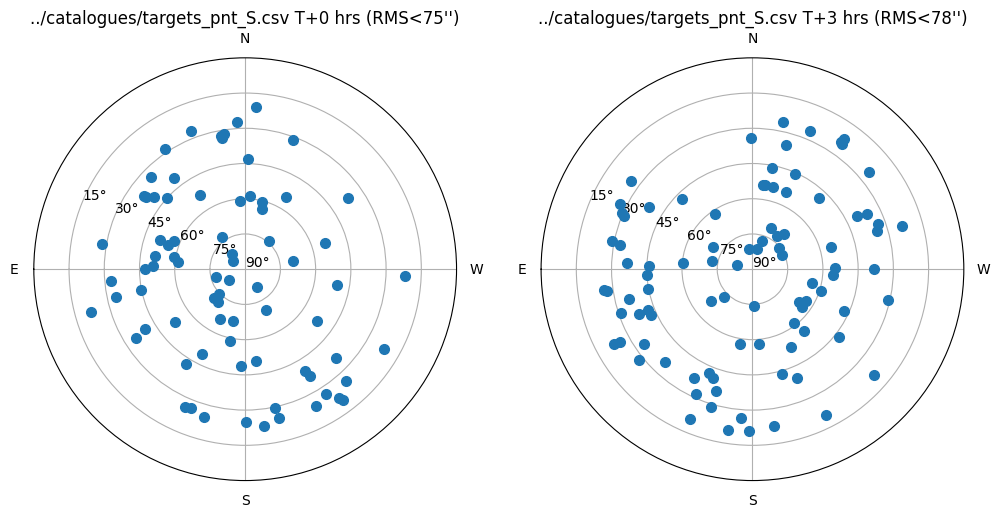

In [6]:
# See which of the two sessions will get better sky coverage using this catalogue:
planning.sim_pointingmeasurements("../catalogues/targets_pnt_S.csv", Tstart=Tobs[0], Hr=3, S=2, el_limit_deg=15, sunmoon_separation_deg=10)

Using  ../catalogues/targets_pnt_Ku.csv
  # Venus, tags=special, no flux info appears within 10 deg from [<katpoint.Target 'Sun' body=special at 0x7f09ece275e0>]
  # Planning drops the following due to being within 1 deg away from other targets:
[<katpoint.Target 'Venus' body=special at 0x7f09ec8a5220>]
  # Venus, tags=special, no flux info appears within 10 deg from [<katpoint.Target 'Sun' body=special at 0x7f09ece38e20>]
  # Planning drops the following due to being within 1 deg away from other targets:
[<katpoint.Target 'Venus' body=special at 0x7f09ec8a5220>]


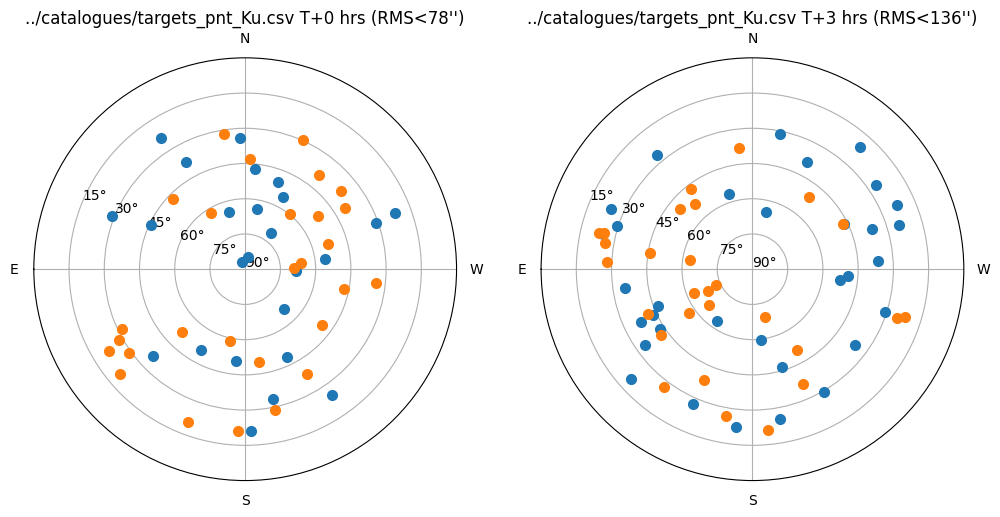

In [7]:
# This catalogue has fewer targets,so multiple visits (different colours) to the targets in each session
planning.sim_pointingmeasurements("../catalogues/targets_pnt_Ku.csv", Tstart=Tobs[0], Hr=3, S=2, el_limit_deg=15, sunmoon_separation_deg=10)

          Name |           Rise UTC |            Set UTC | Max Rate [deg/sec@1GHz] | Flux [Jy@1GHz]
--------------------------------------------------------------------------------
           Sun |  2024/7/1 06:58:28 |  2024/7/2 14:18:31 |                    80.5 | nan
          Moon |  2024/7/1 02:17:10 |  2024/7/2 11:00:41 |                    81.6 | nan
       Mercury |  2024/7/1 08:15:21 |  2024/7/2 15:43:53 |                    81.0 | nan
         Venus |  2024/7/1 07:32:47 |  2024/7/2 14:50:06 |                    80.6 | nan
          Mars |  2024/7/1 02:45:50 |  2024/7/2 10:53:53 |                    84.4 | nan
       Jupiter |  2024/7/1 04:35:23 |  2024/7/2 12:04:06 |                    81.9 | nan
        Saturn |  2024/7/1 22:12:14 |  2024/7/2 08:19:27 |                    87.2 | nan
        Uranus |  2024/7/1 03:35:13 |  2024/7/2 11:18:25 |                    83.0 | nan
       Neptune |  2024/7/1 23:01:11 |  2024/7/2 08:45:22 |                    87.7 | nan
        Zenith |  

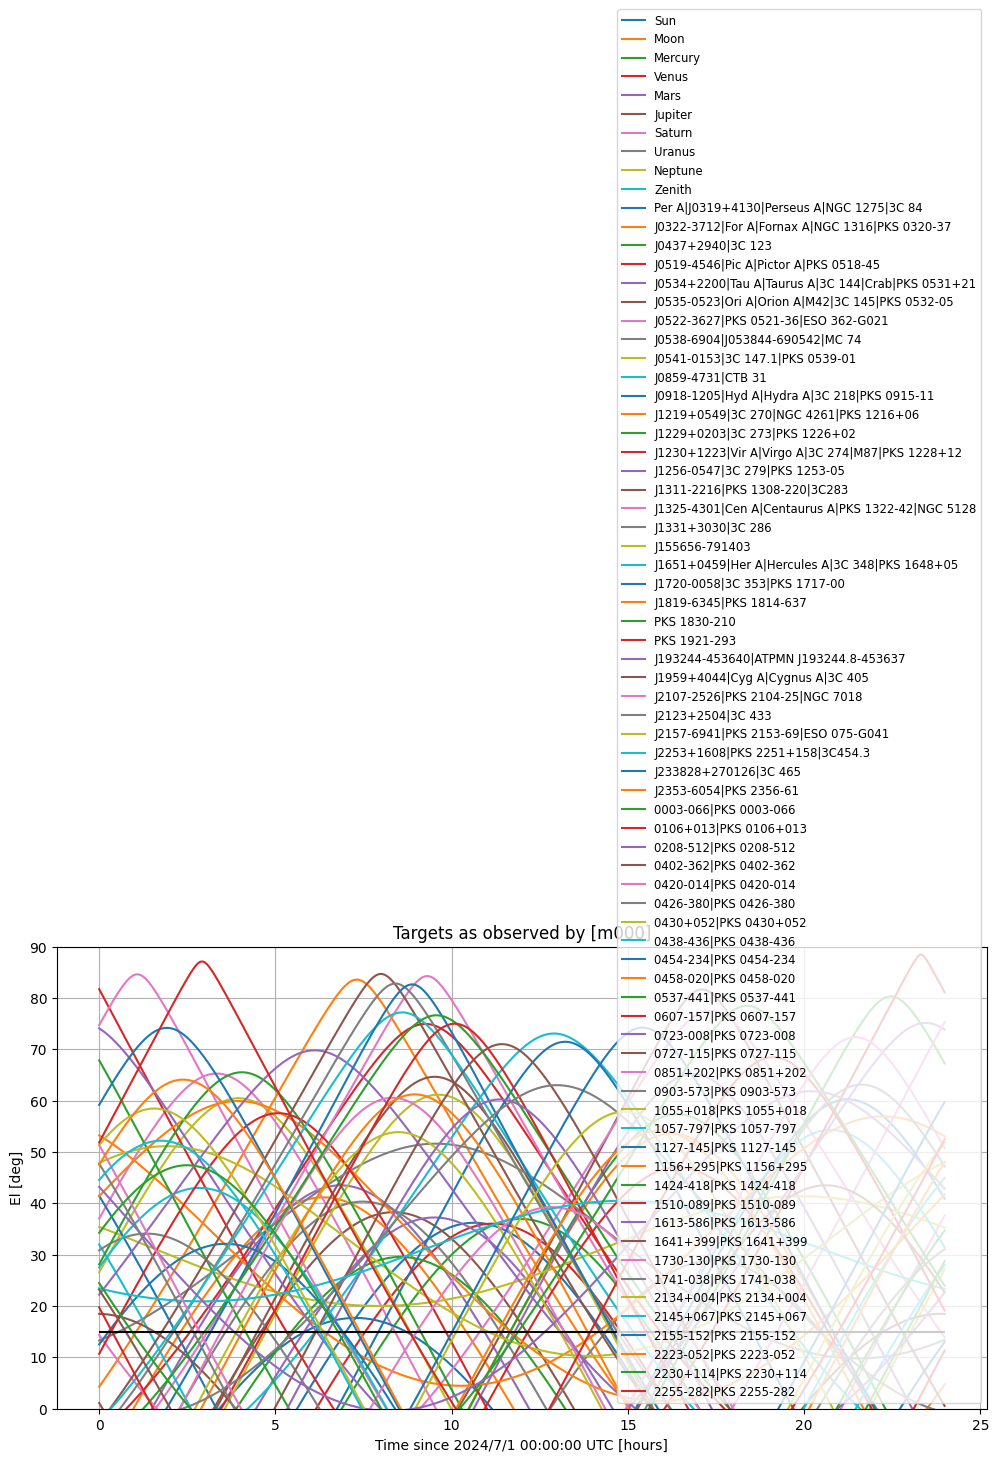

In [8]:
# When during the day will there be more targets at high elevation?
planning.describe_target("*",
                catfn="../catalogues/targets_pnt_Ku.csv", horizon_deg=15, date=Tobs[0], end_date=Tobs[-1],
                catant="m000, -30.713, 21.444, 1050.0", figsize=(12,6));

          Name |           Rise UTC |            Set UTC | Max Rate [deg/sec@1GHz] | Flux [Jy@1GHz]
--------------------------------------------------------------------------------
           Sun |  2024/7/1 06:58:28 |  2024/7/2 14:18:31 |                    80.5 | nan
          Moon |  2024/7/1 02:17:10 |  2024/7/2 11:00:41 |                    81.6 | nan
       Mercury |  2024/7/1 08:15:21 |  2024/7/2 15:43:53 |                    81.0 | nan
         Venus |  2024/7/1 07:32:47 |  2024/7/2 14:50:06 |                    80.6 | nan
          Mars |  2024/7/1 02:45:50 |  2024/7/2 10:53:53 |                    84.4 | nan
       Jupiter |  2024/7/1 04:35:23 |  2024/7/2 12:04:06 |                    81.9 | nan
        Saturn |  2024/7/1 22:12:14 |  2024/7/2 08:19:27 |                    87.2 | nan
        Uranus |  2024/7/1 03:35:13 |  2024/7/2 11:18:25 |                    83.0 | nan
       Neptune |  2024/7/1 23:01:11 |  2024/7/2 08:45:22 |                    87.7 | nan
        Zenith |  

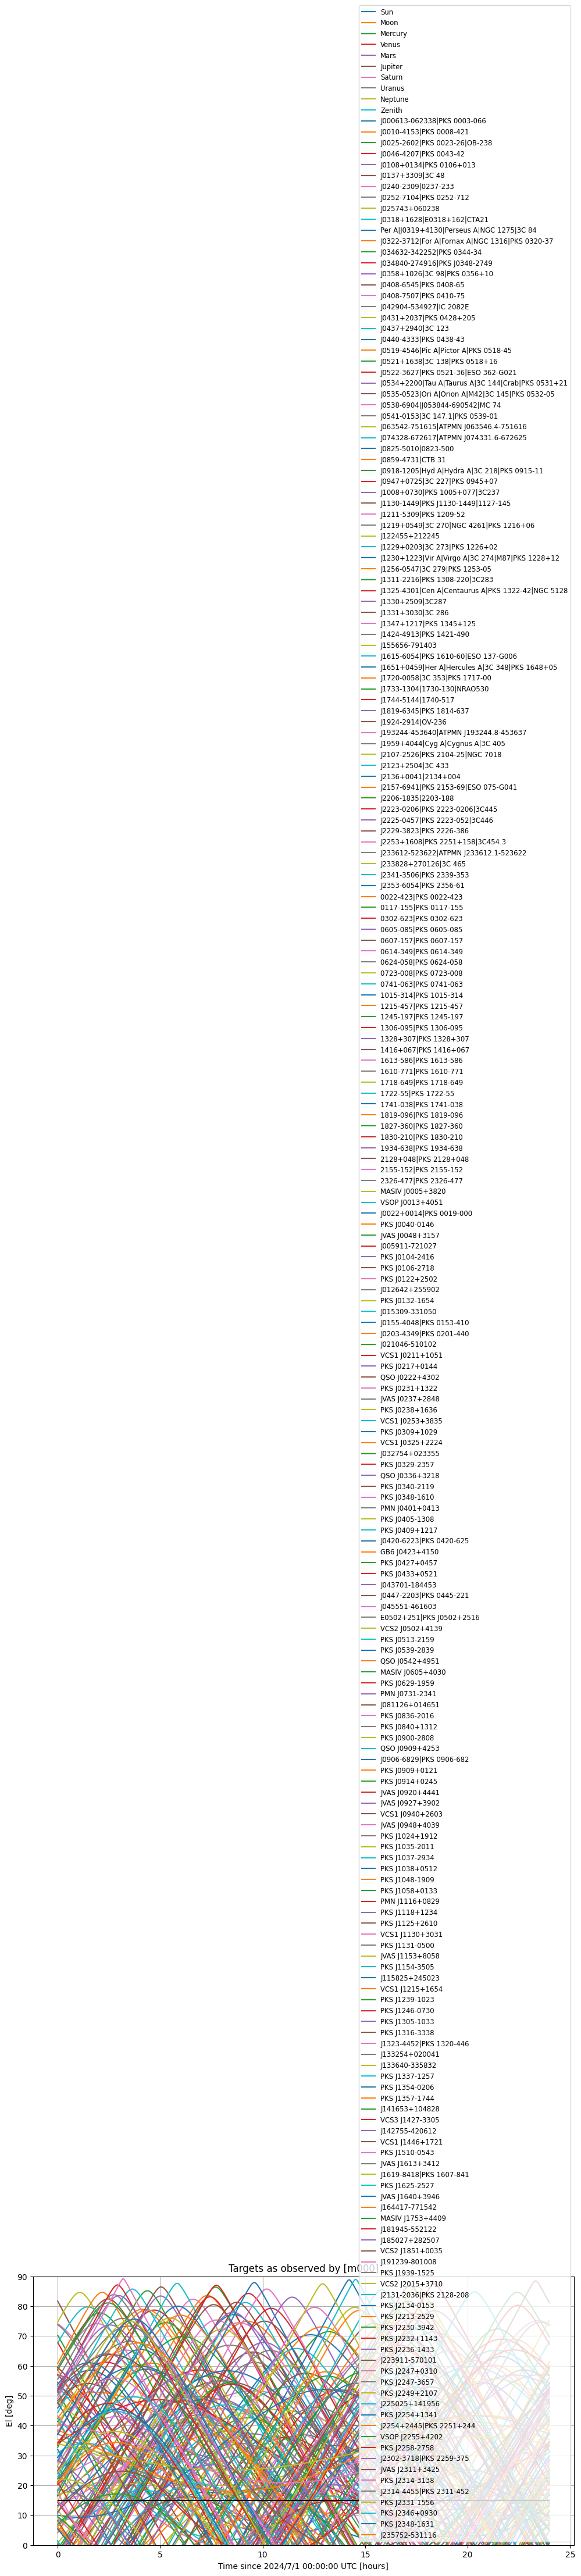

In [9]:
planning.describe_target("*",
                catfn="../catalogues/targets_pnt_S.csv", horizon_deg=15, date=Tobs[0], end_date=Tobs[-1],
                catant="m000, -30.713, 21.444, 1050.0", figsize=(12,6));

          Name |           Rise UTC |            Set UTC | Max Rate [deg/sec@1GHz] | Flux [Jy@1GHz]
--------------------------------------------------------------------------------
           Sun |  2024/7/1 06:58:28 |  2024/7/2 14:18:31 |                    80.5 | nan
          Moon |  2024/7/1 02:17:10 |  2024/7/2 11:00:41 |                    81.6 | nan
       Mercury |  2024/7/1 08:15:21 |  2024/7/2 15:43:53 |                    81.0 | nan
         Venus |  2024/7/1 07:32:47 |  2024/7/2 14:50:06 |                    80.6 | nan
          Mars |  2024/7/1 02:45:50 |  2024/7/2 10:53:53 |                    84.4 | nan
       Jupiter |  2024/7/1 04:35:23 |  2024/7/2 12:04:06 |                    81.9 | nan
        Saturn |  2024/7/1 22:12:14 |  2024/7/2 08:19:27 |                    87.2 | nan
        Uranus |  2024/7/1 03:35:13 |  2024/7/2 11:18:25 |                    83.0 | nan
       Neptune |  2024/7/1 23:01:11 |  2024/7/2 08:45:22 |                    87.7 | nan
        Zenith |  

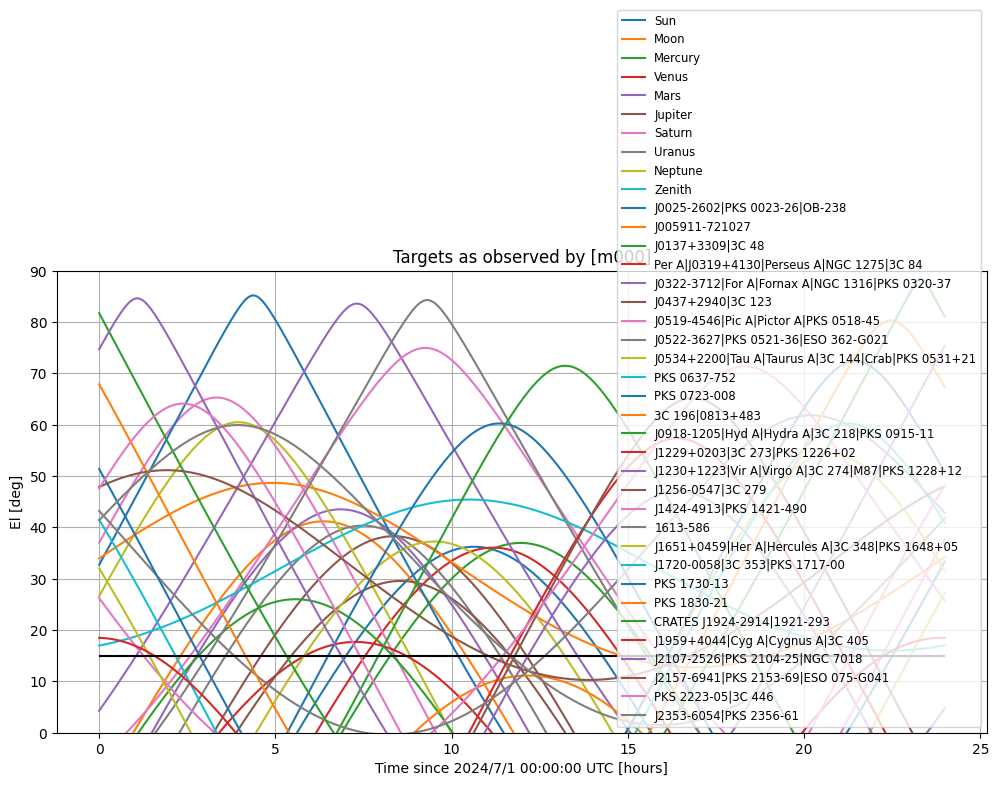

In [10]:
planning.describe_target("*",
                catfn="../catalogues/targets_pnt_L.csv", horizon_deg=15, date=Tobs[0], end_date=Tobs[-1],
                catant="m000, -30.713, 21.444, 1050.0", figsize=(12,6));

## Planning for drift scan measurements

In [11]:
# The calendar day to run the assessment for
Tobs = mkTobs("2024-07-01")

          Name |           Rise UTC |            Set UTC | Max Rate [deg/sec@1GHz] | Flux [Jy@1GHz]
--------------------------------------------------------------------------------
           Sun |  2024/7/1 07:29:32 |  2024/7/2 13:47:31 |                    80.5 | nan
    J0534+2200 |  2024/7/1 06:19:08 |  2024/7/2 12:37:54 |                    81.3 | nan
    J0535-0523 |  2024/7/1 04:52:08 |  2024/7/2 14:05:52 |                    87.3 | nan
    J0918-1205 |  2024/7/1 08:18:39 |  2024/7/2 18:03:42 |                    85.7 | 58.5
    J1651+0459 |  2024/7/1 16:32:53 |  2024/7/2 00:57:09 |                    87.5 | 64.1
    J0519-4546 |  2024/7/1 03:06:57 |  2024/7/2 15:19:13 |                   -61.2 | 92.5
    J1230+1223 |  2024/7/1 12:35:45 |  2024/7/2 20:11:11 |                    85.9 | 264.9
    J1939-6342 |  2024/7/1 16:24:30 |  2024/7/2 06:43:20 |                   -39.1 | 15.4


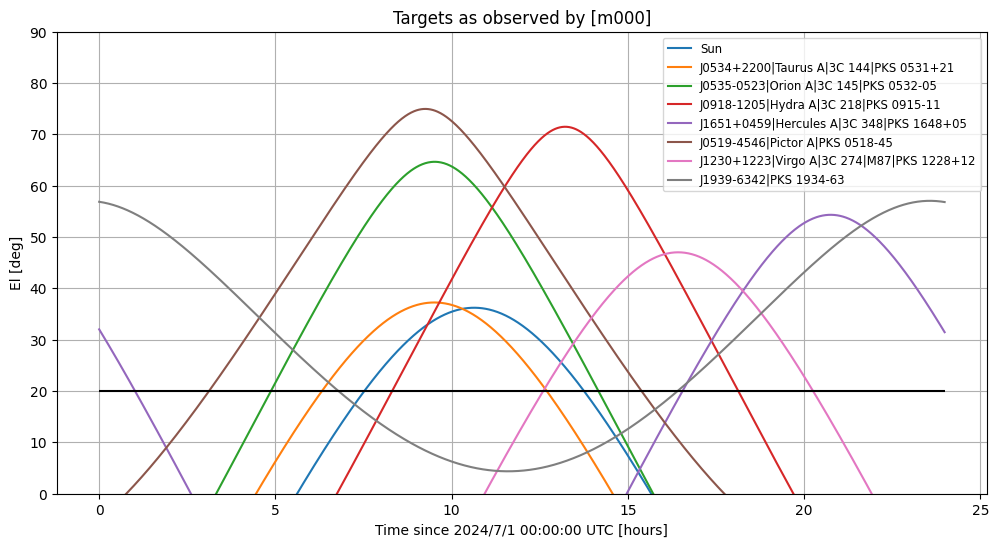

In [12]:
planning.describe_target("Sun|Taurus A|Orion A|Hydra A|Hercules A|Pictor A|Virgo A|PKS 1934-63",
                catfn="../catalogues/fluxmodels.csv", horizon_deg=20, date=Tobs[0], end_date=Tobs[-1],
                catant="m000, -30.713, 21.444, 1050.0", figsize=(12,6));

## Planning for tip curve measurements

In [13]:
# The calendar day to run the assessment for
Tobs = mkTobs("2024-07-01")

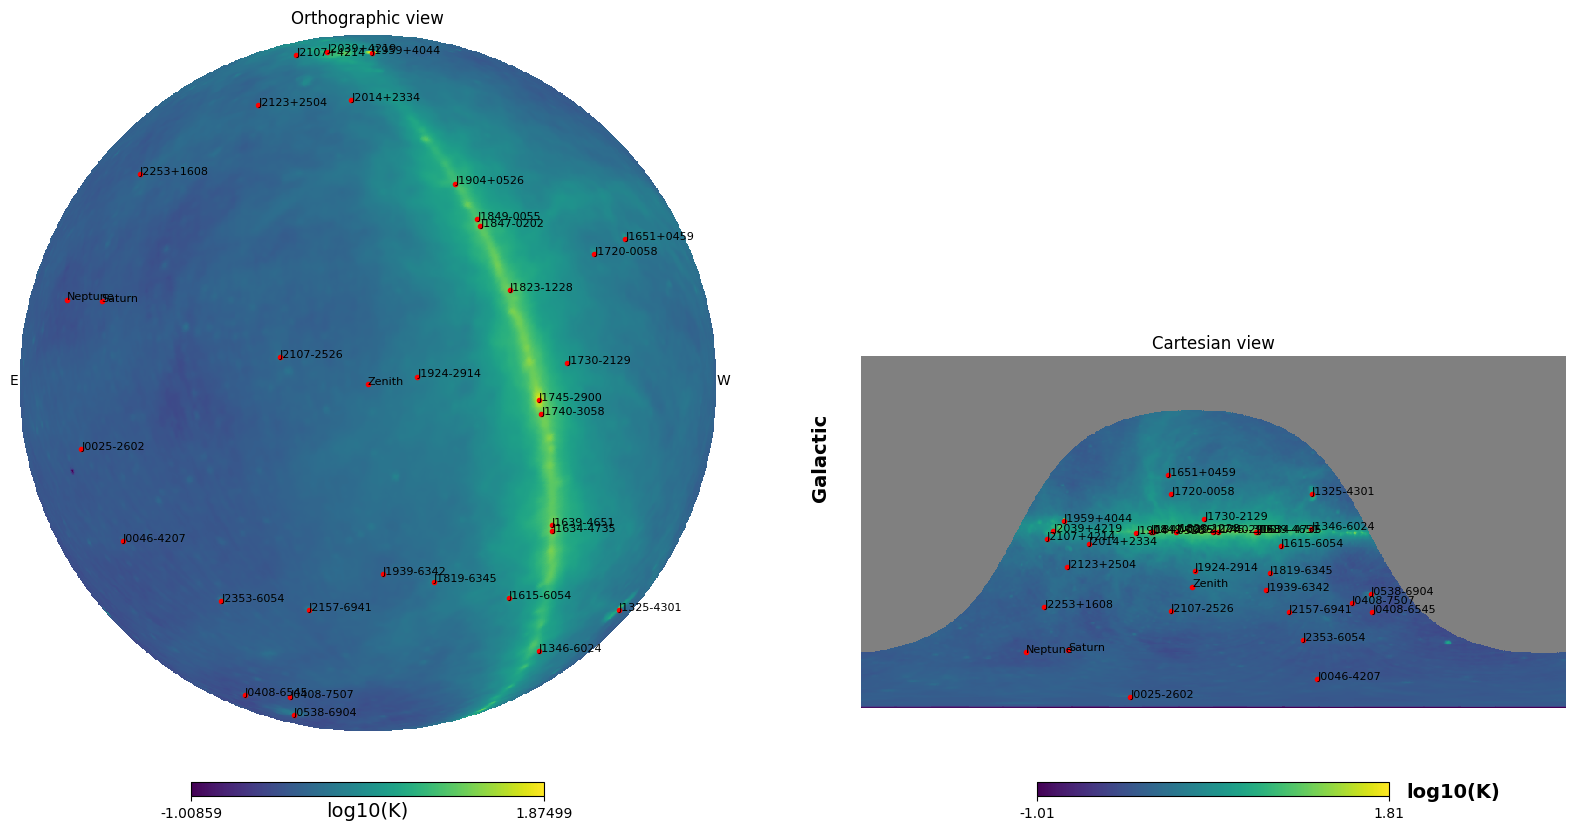

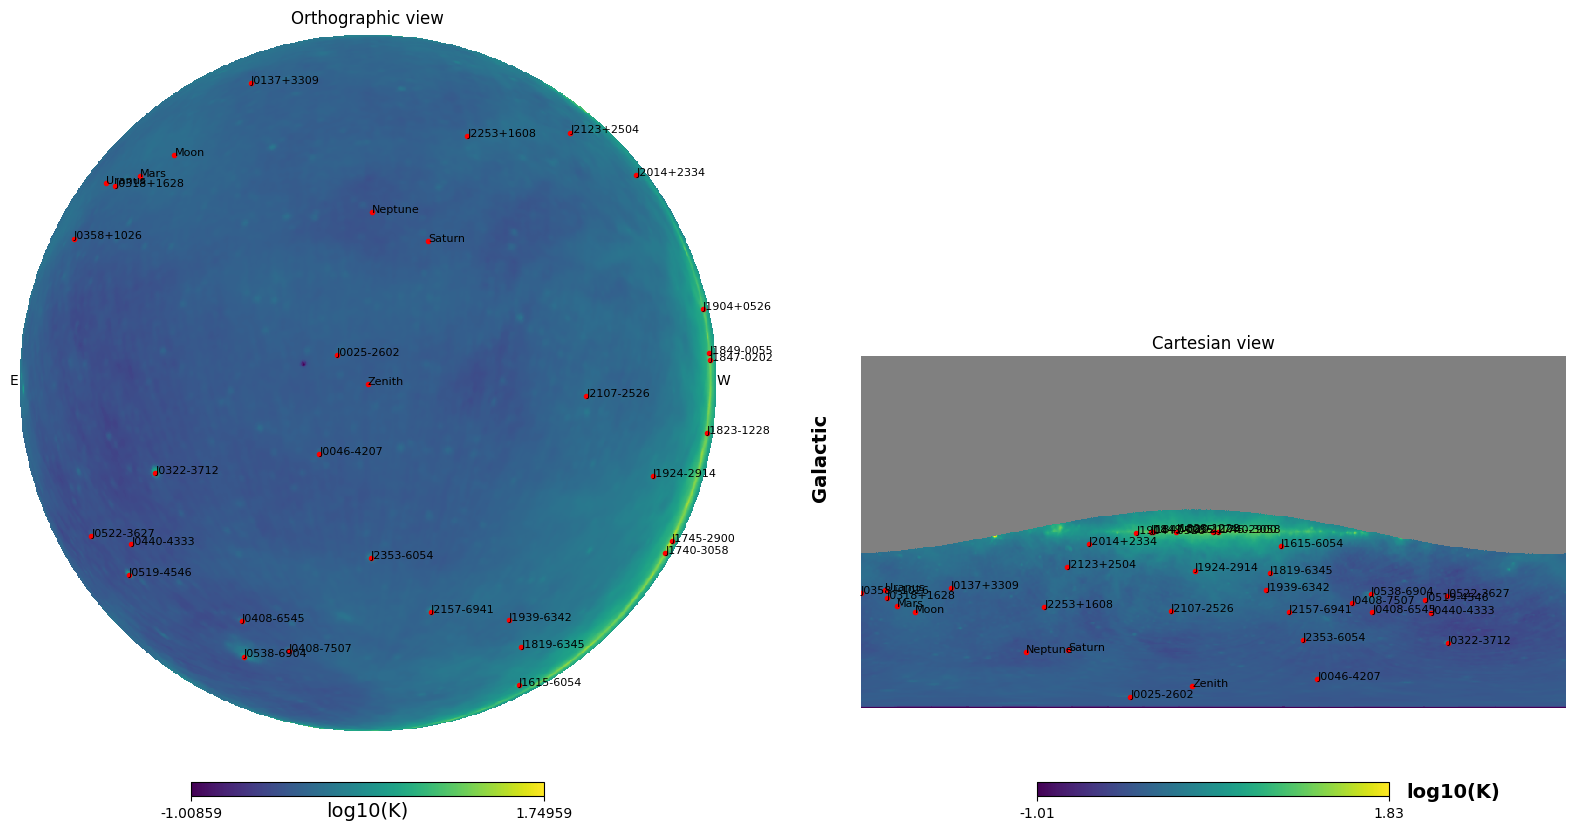

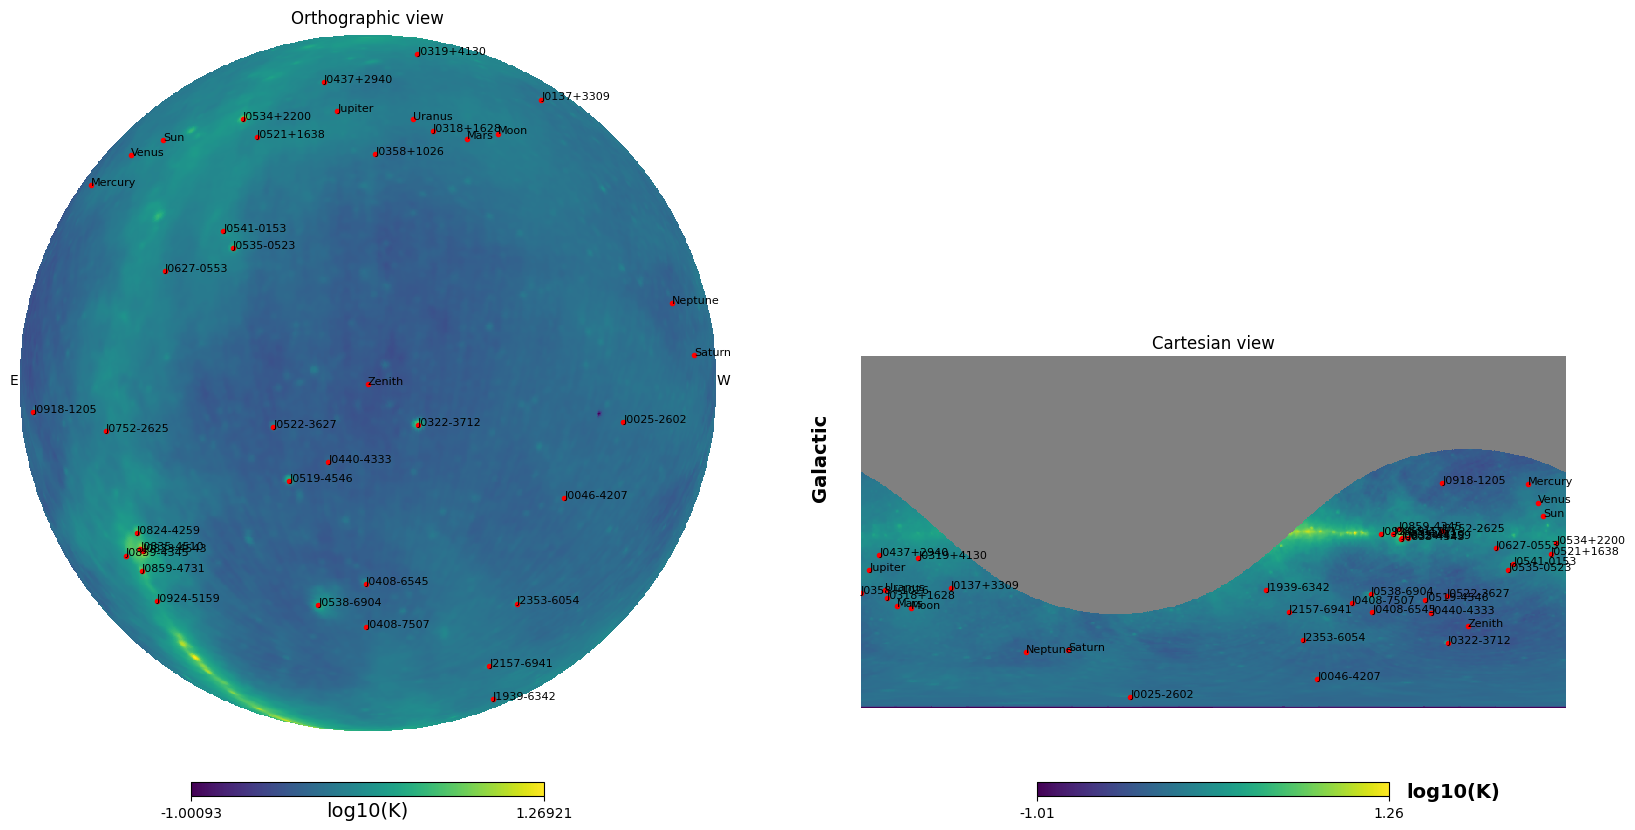

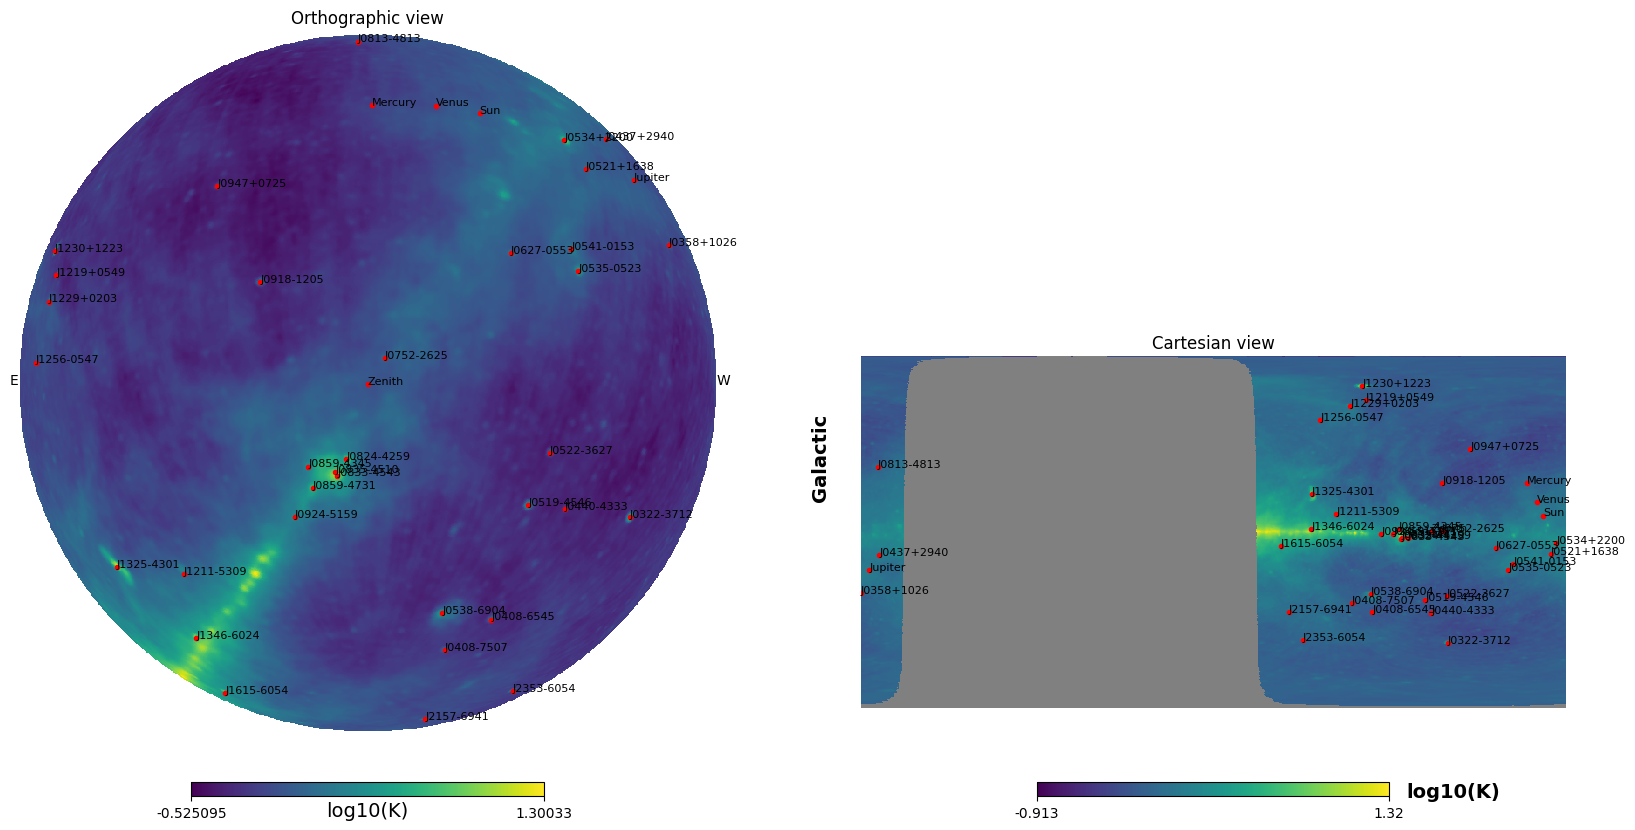

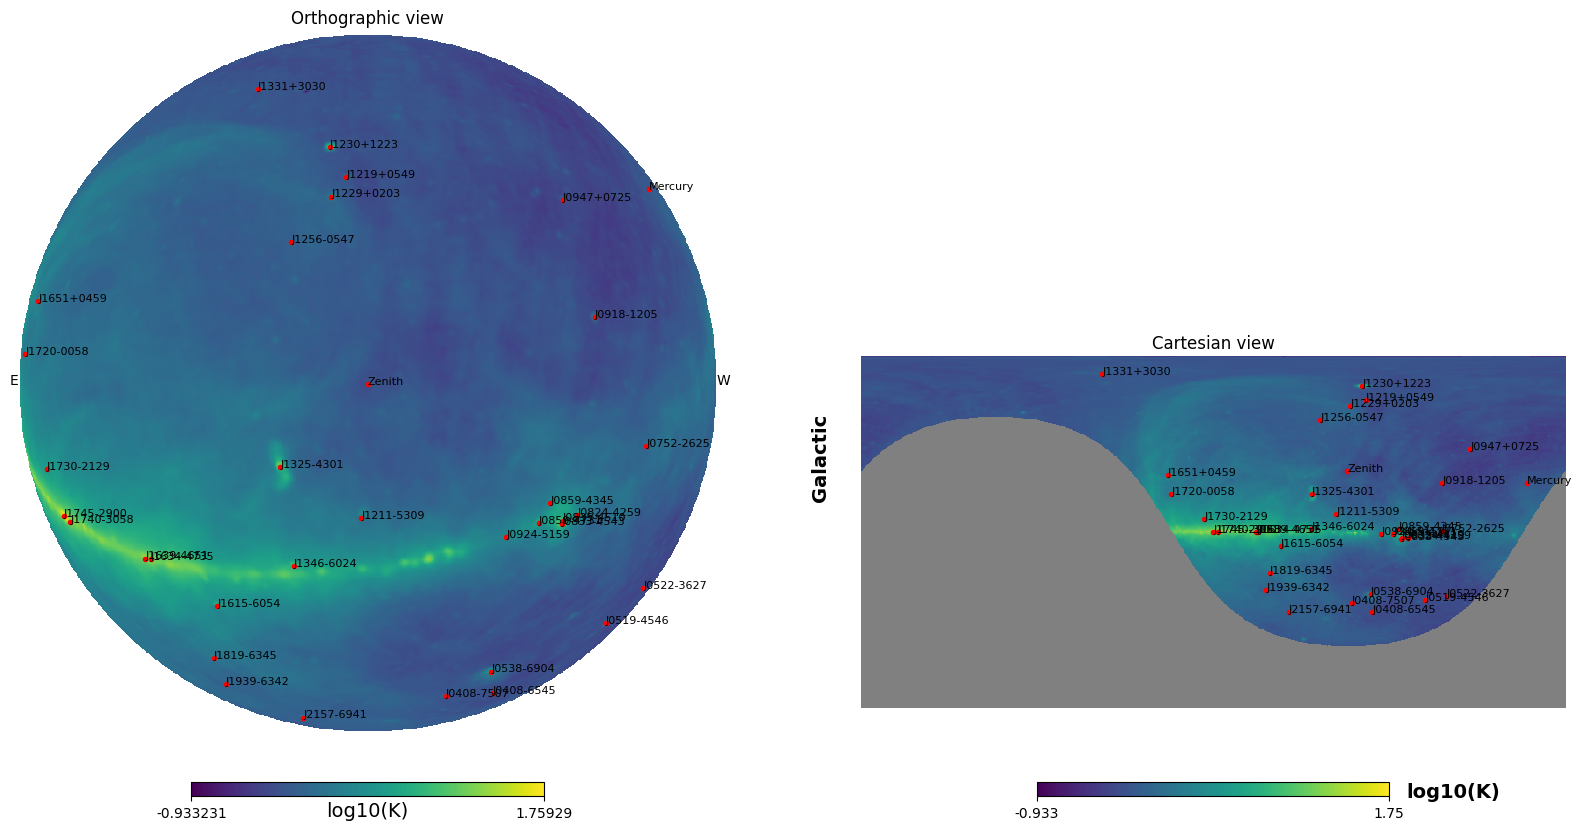

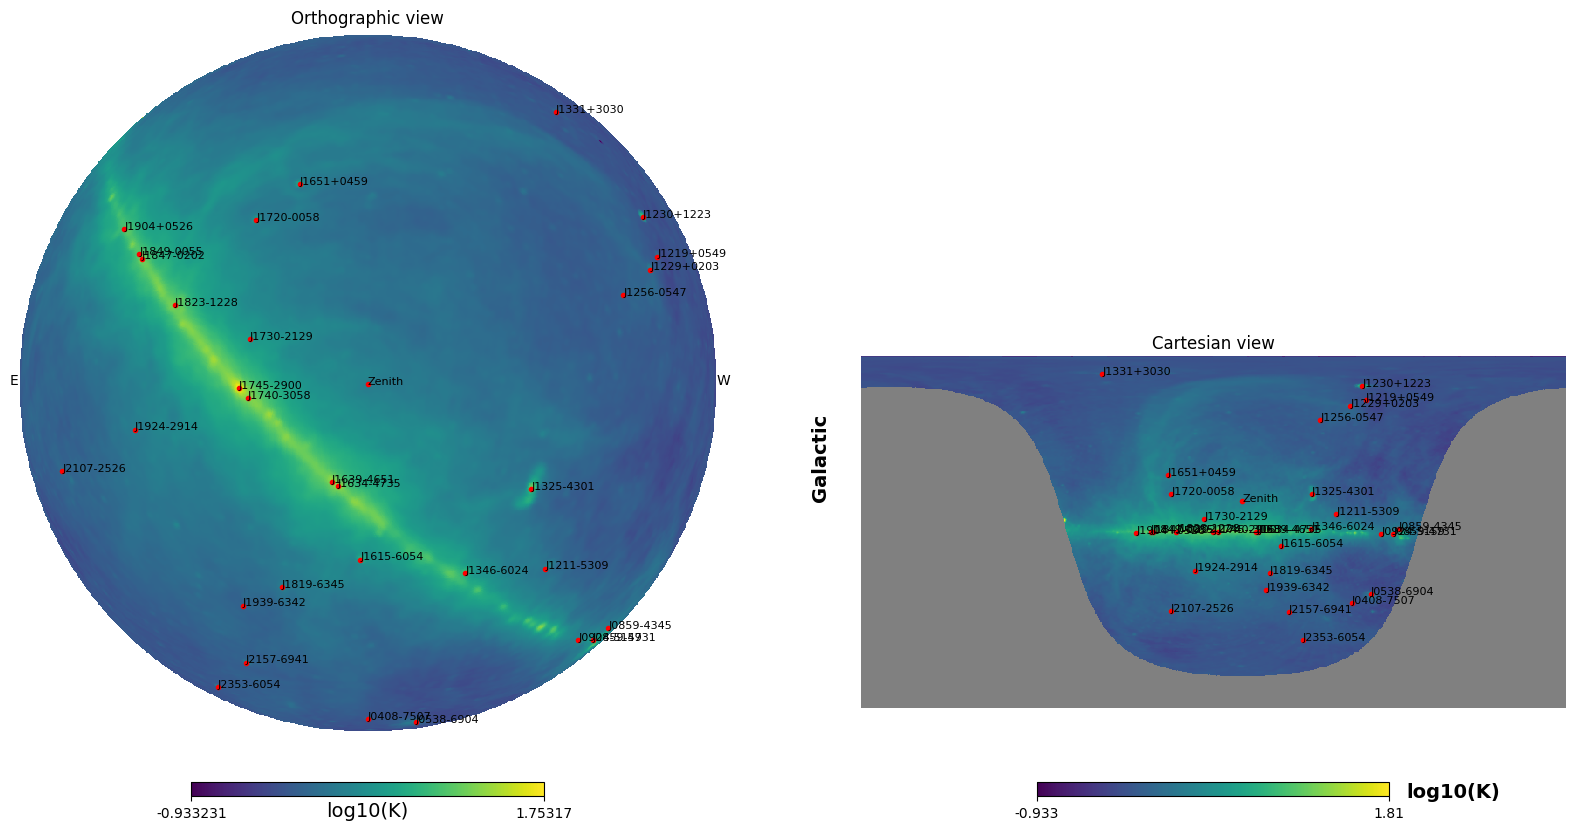

In [14]:
# Want to pick a time of day and an azimuth angle that doesn't cross the galaxy or the Sun!
for T in np.arange(Tobs[0], Tobs[-1], 4*60*60): # Consider 4 hourly intervals
    planning.radiosky(T, f_MHz=1400, catfn="../catalogues/sources_all.csv", el_limit_deg=10, tabulate=False)

## Other

In [15]:
# Dish nominal delay model - see [DVS Operations Guide]
# Remember: SKA-MPI = SKA000
llh, enu_niao = cattools.nominal_pos("SKA119", verbose=True)

SKA119
nominal_position = -30.778551, 21.397161, 1141.1
delay-model: -4473.8 -7485.2 58.3 0 0 1.6
